In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"D:\Valuation of companies\unicorns till sep 2022.csv")

# Preview the dataset
print(df.head())
print("\nShape of dataset:", df.shape)
print("\nInfo:")
print(df.info())


     Company Valuation ($B) Date Joined        Country          City   \
0  ByteDance           $140    4/7/2017          China        Beijing   
1     SpaceX           $127   12/1/2012  United States      Hawthorne   
2      SHEIN           $100    7/3/2018          China       Shenzhen   
3     Stripe            $95   1/23/2014  United States  San Francisco   
4      Canva            $40    1/8/2018      Australia    Surry Hills   

                          Industry  \
0          Artificial intelligence   
1                            Other   
2  E-commerce & direct-to-consumer   
3                          Fintech   
4     Internet software & services   

                                           Investors  
0  Sequoia Capital China, SIG Asia Investments, S...  
1  Founders Fund, Draper Fisher Jurvetson, Rothen...  
2  Tiger Global Management, Sequoia Capital China...  
3        Khosla Ventures, LowercaseCapital, capitalG  
4  Sequoia Capital China, Blackbird Ventures, Mat...  

S

In [2]:
print(df.columns)


Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City ',
       'Industry', 'Investors'],
      dtype='object')


In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv("unicorns till sep 2022.csv")

# Strip any leading/trailing whitespace from column names
df.columns = df.columns.str.strip()

# Clean 'Valuation ($B)' column: remove '$' and 'B', convert to float
df['Valuation ($B)'] = df['Valuation ($B)'].replace('[\$,B]', '', regex=True).astype(float)

# Convert 'Date Joined' to datetime
df['Date Joined'] = pd.to_datetime(df['Date Joined'], errors='coerce')

# Check for missing values
missing_values = df.isnull().sum()

# Preview cleaned data
print(df.head())
print("\nMissing values in dataset:\n", missing_values)



     Company  Valuation ($B) Date Joined        Country           City  \
0  ByteDance           140.0  2017-04-07          China        Beijing   
1     SpaceX           127.0  2012-12-01  United States      Hawthorne   
2      SHEIN           100.0  2018-07-03          China       Shenzhen   
3     Stripe            95.0  2014-01-23  United States  San Francisco   
4      Canva            40.0  2018-01-08      Australia    Surry Hills   

                          Industry  \
0          Artificial intelligence   
1                            Other   
2  E-commerce & direct-to-consumer   
3                          Fintech   
4     Internet software & services   

                                           Investors  
0  Sequoia Capital China, SIG Asia Investments, S...  
1  Founders Fund, Draper Fisher Jurvetson, Rothen...  
2  Tiger Global Management, Sequoia Capital China...  
3        Khosla Ventures, LowercaseCapital, capitalG  
4  Sequoia Capital China, Blackbird Ventures, Mat..

Step 3: EDA – Key Visualizations
1. Top 10 Countries by Number of Unicorns

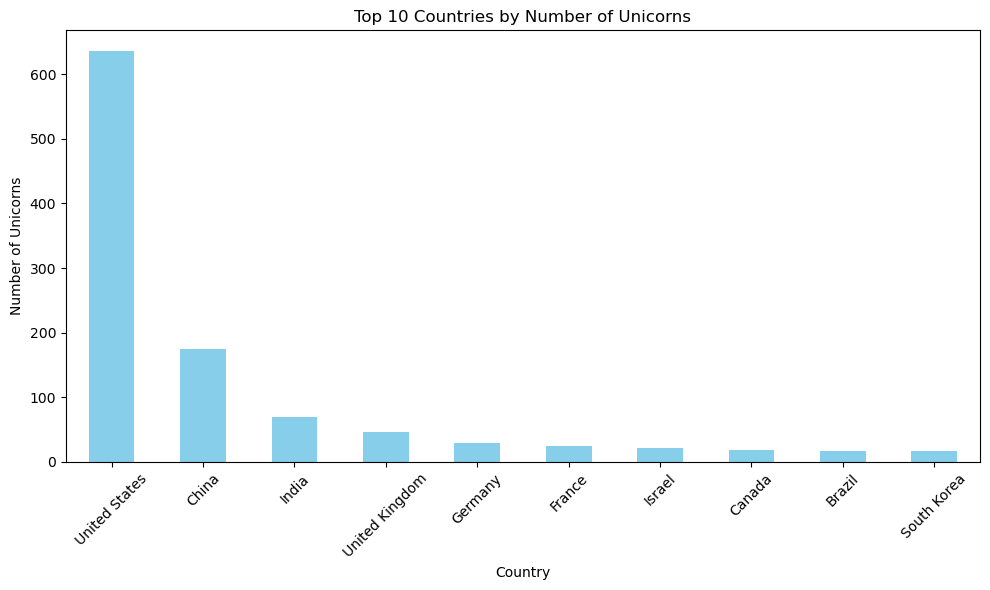

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
df['Country'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Countries by Number of Unicorns")
plt.xlabel("Country")
plt.ylabel("Number of Unicorns")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


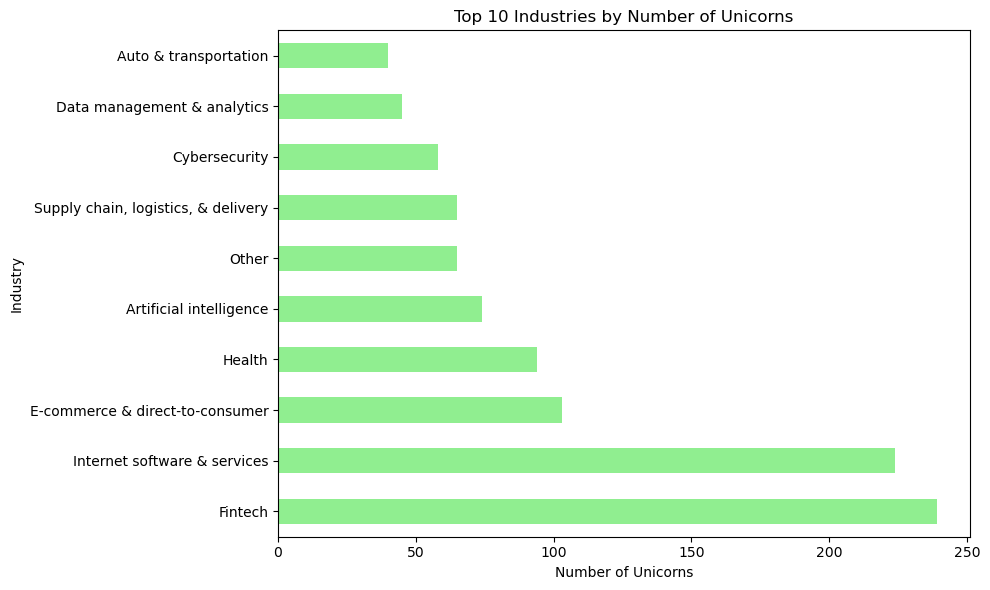

In [5]:
# 2. Top 10 Industries by Unicorn Count

plt.figure(figsize=(10,6))
df['Industry'].value_counts().head(10).plot(kind='barh', color='lightgreen')
plt.title("Top 10 Industries by Number of Unicorns")
plt.xlabel("Number of Unicorns")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()

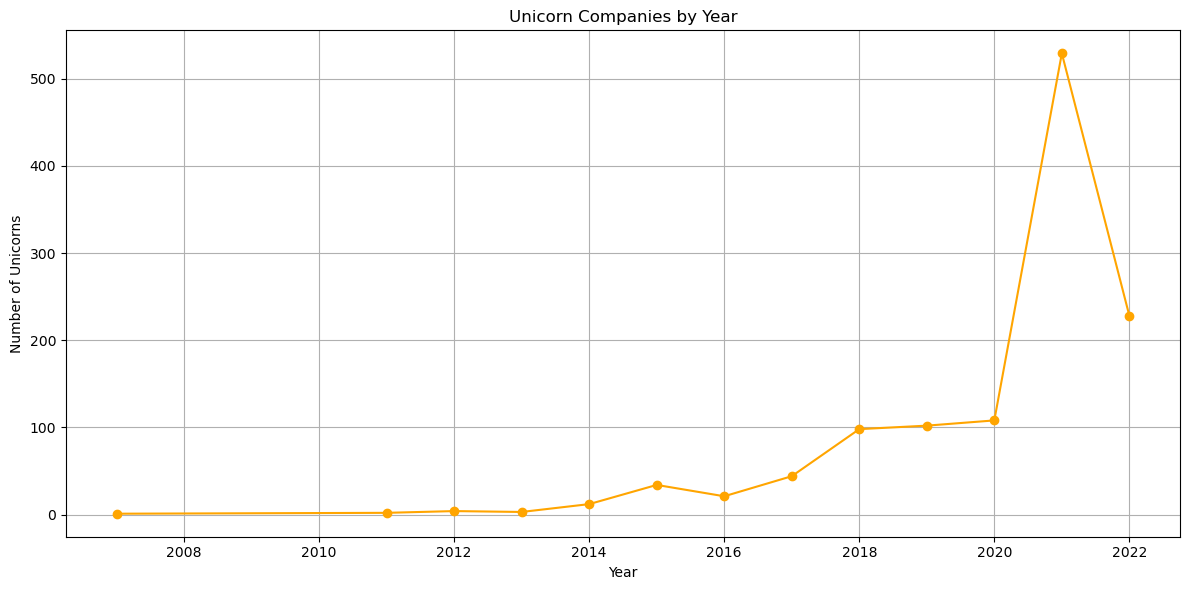

In [6]:
# 3. Unicorns Founded Over Time (Per Year)

plt.figure(figsize=(12,6))
df['Year Joined'] = df['Date Joined'].dt.year
df['Year Joined'].value_counts().sort_index().plot(kind='line', marker='o', color='orange')
plt.title("Unicorn Companies by Year")
plt.xlabel("Year")
plt.ylabel("Number of Unicorns")
plt.grid(True)
plt.tight_layout()
plt.show()

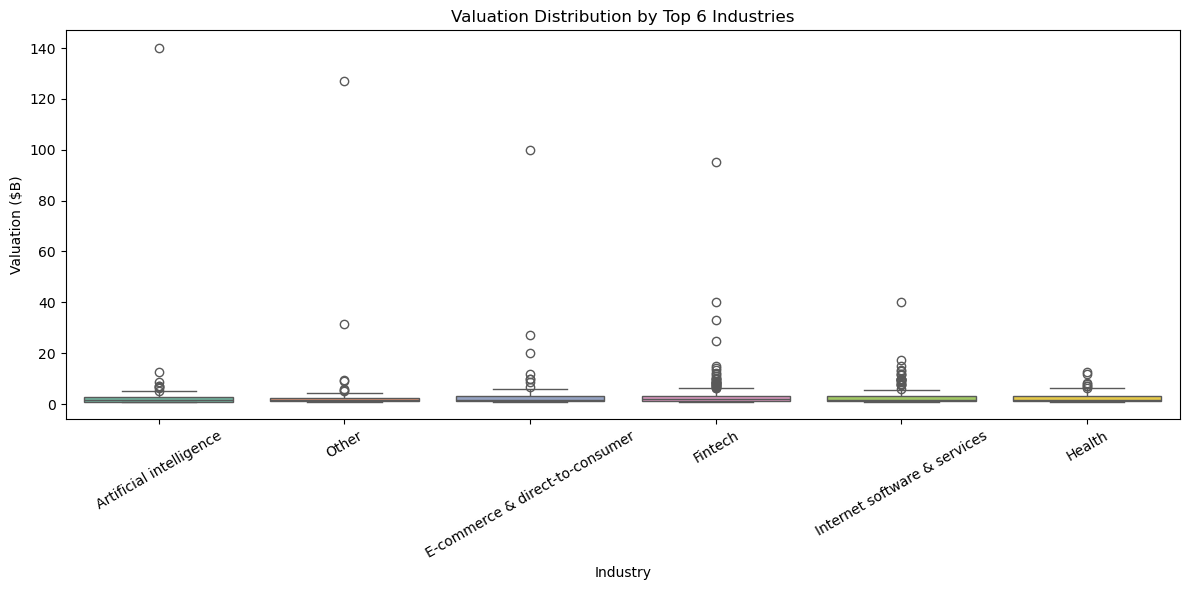

In [7]:
# 4. Boxplot of Valuation by Industry (Top 6)

top_industries = df['Industry'].value_counts().head(6).index
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df[df['Industry'].isin(top_industries)],
    x='Industry',
    y='Valuation ($B)',
    hue='Industry',
    palette='Set2',
    legend=False
)
plt.title("Valuation Distribution by Top 6 Industries")
plt.ylabel("Valuation ($B)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
# Load data
df = pd.read_csv(r"D:\Valuation of companies\unicorns till sep 2022.csv")

# Rename the valuation column for ease
df.rename(columns={'Valuation ($B)': 'Valuation'}, inplace=True)

# Convert 'Valuation' to numeric
df['Valuation'] = df['Valuation'].replace('[\$,B]', '', regex=True).astype(float)

# Convert 'Date Joined' to datetime
df['Date Joined'] = pd.to_datetime(df['Date Joined'], errors='coerce')

# Drop rows with missing 'Valuation'
df.dropna(subset=['Valuation'], inplace=True)

# Feature engineering: extract year and month from date
df['Year Joined'] = df['Date Joined'].dt.year
df['Month Joined'] = df['Date Joined'].dt.month

# Drop original date column
df.drop(columns=['Date Joined'], inplace=True)


In [10]:
# Drop company name and investors (text-heavy, not suitable for model now)
df = df.drop(['Company', 'Investors'], axis=1)

# Define target and features
X = df.drop('Valuation', axis=1)
y = df['Valuation']



In [11]:
# Define categorical columns
categorical_cols = X.select_dtypes(include='object').columns.tolist()

# Define numeric columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing: OneHot encode categorical features
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Pipeline: Preprocessing + Model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Fit model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)


In [13]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest MSE: {mse:.2f}")
print(f"Random Forest R² Score: {r2:.2f}")


Random Forest MSE: 42.92
Random Forest R² Score: -3.88


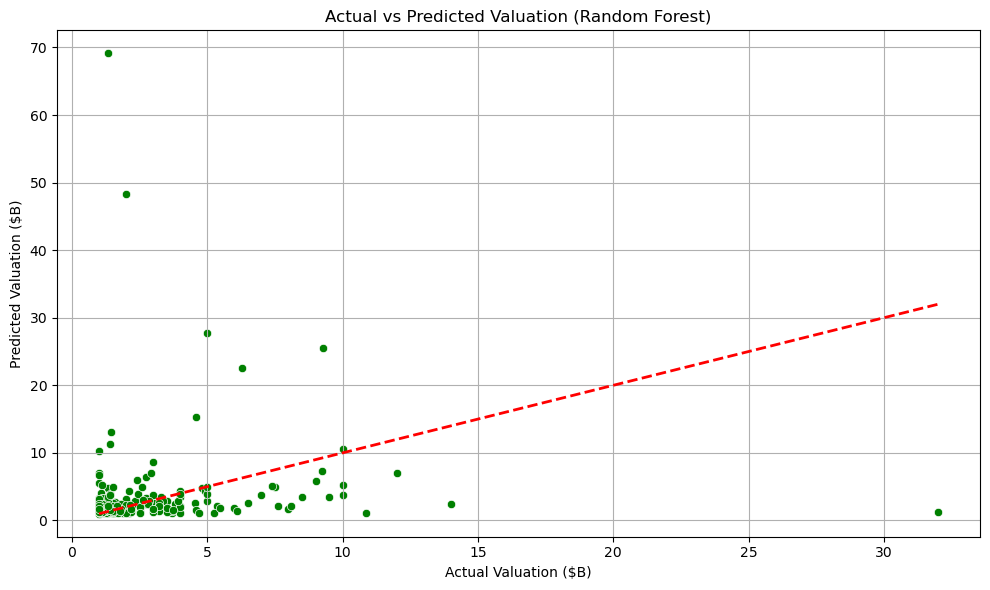

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Valuation ($B)")
plt.ylabel("Predicted Valuation ($B)")
plt.title("Actual vs Predicted Valuation (Random Forest)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
df.columns = df.columns.str.replace('\xa0', ' ').str.strip()
feature_cols = ['Country', 'City', 'Industry', 'Year Joined', 'Month Joined']
target_col = 'Valuation'

X = df[feature_cols]
y = df[target_col]
# Clean column names
df.columns = df.columns.str.replace('\xa0', ' ').str.strip()

# Define features and target
feature_cols = ['Country', 'City', 'Industry', 'Year Joined', 'Month Joined']
target_col = 'Valuation'

X = df[feature_cols]
y = df[target_col]



In [16]:
import pandas as pd
import numpy as np

# Load your data
df = pd.read_csv(r"D:\Valuation of companies\unicorns till sep 2022.csv")  # Replace with your file path if needed

# Clean column names
df.columns = df.columns.str.strip()

# Simplify city: group rare cities
city_counts = df['City'].value_counts()
rare_cities = city_counts[city_counts < 5].index
df['City'] = df['City'].apply(lambda x: 'Other' if x in rare_cities else x)

# Convert valuation column to numeric
df['Valuation'] = df['Valuation ($B)'].str.replace('$', '').str.replace('B', '').astype(float)

# Extract date parts
df['Date Joined'] = pd.to_datetime(df['Date Joined'])
df['Year Joined'] = df['Date Joined'].dt.year
df['Month Joined'] = df['Date Joined'].dt.month

# Handle investors column
df['num_investors'] = df['Investors'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)


In [17]:
feature_cols = ['Country', 'City', 'Industry', 'Year Joined', 'Month Joined', 'num_investors']
target_col = 'Valuation'

X = df[feature_cols]
y = df[target_col]


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: categorical & numeric
categorical = ['Country', 'City', 'Industry']
numeric = ['Year Joined', 'Month Joined', 'num_investors']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('num', 'passthrough', numeric)  # ✅ Changed from 'remainder' to 'num'
])

# Model pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Country', 'City',
                                                   'Industry']),
                                                 ('num', 'passthrough',
                                                  ['Year Joined',
                                                   'Month Joined',
                                                   'num_investors'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [19]:
# Predict
y_pred = pipeline.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")


R² Score: -3.8547
MAE: 2.4973
MSE: 42.6586
RMSE: 6.5314


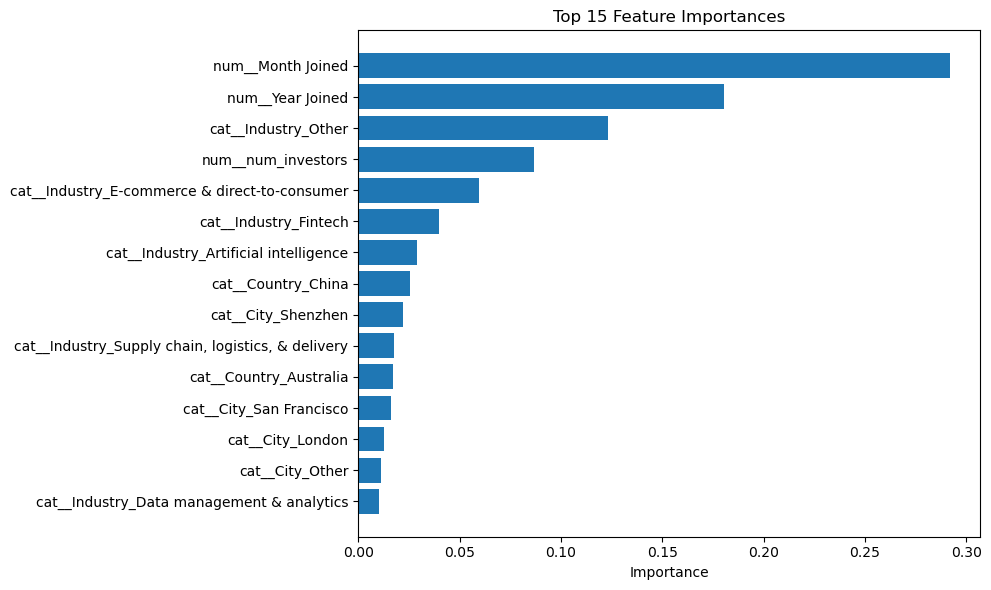

In [20]:
import matplotlib.pyplot as plt

model = pipeline.named_steps['model']
importances = model.feature_importances_
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
sorted_idx = np.argsort(importances)[-15:]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.title("Top 15 Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()
